# Week 5

In [5]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles
import scipy.stats as stats
import random

# Loading the libraries
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random

## Week 4 Day 3: Intro to Probability (2)
### Bayes' Theorem
* The Bayes' Theorem is a result in probability theory which relates the conditinal probabilities of two events, $A$ and $B$. It is a simple and powerful tool that allows us to *reverse the conditioning* in a conditional probability calculations. In short, it says that the relation between $P(A \mid B)$ and $P(B \mid A)$ is given by
\begin{equation} P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)} \end{equation}
This result extends beyond simple probabilities and is heavily exploited in classification methods in machine learning (and not just there)

We will demonstrate its application on through examples.

### Example 1
* It is estimated that 4% of people who spend time in the woods will get Lyme disease. Of people with Lyme disease, the test to determine if you have it is will give a positive reading 97% of the time. Of people who do not have Lyme disease, the same test will give a negative rating 92% of the time. Find the probability that a **person really has Lyme disease, given that they test positive**.

In [66]:
# Number of simulations:
n = 10000

# Initialize variables:
hasLyme, noLyme = 0, 0

hasLymeAndPositive, hasLymeAndNegative = 0, 0

positiveTest = 0

# Simulations:
for i in range(n):
    prob = np.random.random()
    test = np.random.random()
    
    if prob <= 0.04:
        # has Lyme
        hasLyme += 1
        
        if test <= 0.03:
            # has negative test result and lymes
            hasLymeAndNegative += 1
        else:
            # has positive test result and lymes
            hasLymeAndPositive += 1
            
            positiveTest += 1
            
    else:
        # does not have Lyme
        noLyme += 1
        
        if test <= 0.08:
            positiveTest += 1


print(f"P(L) = {hasLyme / n}")
print(f"P(L') = {noLyme / n}")
print(f"P(+ | L) = {hasLymeAndPositive / n}")
print(f"P(- | L) = {hasLymeAndNegative / n}")
print(f"P(+) = {positiveTest / n}")
print('---')
print(f"P(L | +) = ( P(+ | L) * P(L) ) / P(+) = {((hasLymeAndPositive / n) * (hasLyme / n)) / (positiveTest / n)}")

P(L) = 0.0397
P(L') = 0.9603
P(+ | L) = 0.0385
P(- | L) = 0.0012
P(+) = 0.1155
---
P(L | +) = ( P(+ | L) * P(L) ) / P(+) = 0.013233333333333333


In [67]:
# Number of simulations:
n = 10000

# Initialize variables:
hasLyme, noLyme = 0, 0

hasLymeAndPositive, hasLymeAndNegative = 0, 0

positiveTest = 0

# Simulations:
for i in range(n):
    prob = np.random.random()
    test = np.random.random()
    
    if prob <= 0.04:
        # has Lyme
        hasLyme += 1
        
        if test <= 0.97:
            hasLymeAndPositive += 1
            
            positiveTest += 1
            
    else:
        if test <= 0.08: positiveTest += 1


print(f"P(L) = {hasLyme / n}")
print(f"P(L') = {noLyme / n}")
print(f"P(+ | L) = {hasLymeAndPositive / n}")
print(f"P(- | L) = {hasLymeAndNegative / n}")
print(f"P(+) = {positiveTest / n}")
print('---')
print(f"P(L | +) = ( P(+ | L) * P(L) ) / P(+) = {((hasLymeAndPositive / n) * (hasLyme / n)) / (positiveTest / n)}")

P(L) = 0.0424
P(L') = 0.0
P(+ | L) = 0.0412
P(- | L) = 0.0
P(+) = 0.1182
---
P(L | +) = ( P(+ | L) * P(L) ) / P(+) = 0.014779018612521152


### Example 2
Tom has three ways of getting to work. 30% of the time he travels by car, 20% of the time he rides his bicycle and 50% of the time he walks.

* When travelling by car, Tom is late 5% of the time.
* When riding his bicycle he is late 10% of the time.
* When walking he is late 25% of the time.

Given that he was on time one day, find the probability that he got to work riding his bicycle.

In [73]:
# Number of simulations:
n = 5000

# Initialize variables:
b, c, w = 0, 0, 0

notLate = 0

BicycleAndNotLate = 0

# Simulations:
for i in range(n):
    transport = np.random.random()
    late = np.random.random()
    
    if transport <= 0.2:
        # Bicycle:
        b += 1
        
        # Not Late:
        if late <= 0.9:
            # Bicycle and Not Late:
            BicycleAndNotLate += 1
            notLate += 1
    
    elif 0.2 < transport <= 0.5:
        # Car:
        c += 1
        
        if late <= 0.95:
            # Car and Not Late
            notLate += 1
        
    else:
        # Walk:
        w += 1
        
        if late <= 0.75:
            # Walk and Not Late:
            notLate += 1

P_B = b / n
P_C = c / n
P_W = w / n

P_notLate = notLate / n
P_BicycleAndNotLate = BicycleAndNotLate / n

print(f"P(B) = {P_B}")
print(f"P(C) = {P_C}")
print(f"P(W) = {P_W}")
print("---")
print(f"P(L') = {P_notLate}")
print(f"P(B and L') = {P_BicycleAndNotLate}")
print("---")
print(f"P(B | L') = P(B and L') / P(L') = {P_BicycleAndNotLate / P_notLate}")

P(B) = 0.2054
P(C) = 0.3076
P(W) = 0.487
---
P(L') = 0.8448
P(B and L') = 0.1838
---
P(B | L') = P(B and L') / P(L') = 0.21756628787878787


---

## Week 5 Day 1: Random Variables & Probability Distributions

* Let us toss a fair coin. Two outcomes are possible: **H** or **T**. Let us introduce a variable $X$ that will count the number of **H** when tossing.
* $X \in \{0, 1\}$ -- there are two possible values for $X$:
    * $X = 0$ means that **H** has not occurred
    * $X = 1$ means that **H** has occurred

We can summarize the outcomes in a table or on a bar graph

0    1
P(X=x)  0.5  0.5

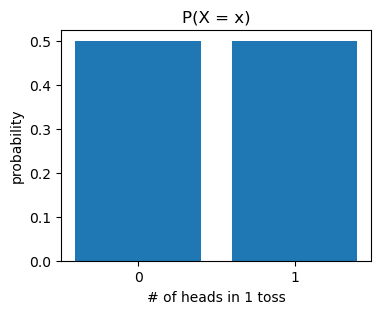

In [74]:
table = pd.DataFrame(columns = ['0', '1'],
                     index = ['P(X=x)'])

table.loc['P(X=x)'] = [0.5, 0.5]

display(table)

plt.figure(figsize=(4, 3))
plt.bar(x = ['0', '1'], height = [0.5, 0.5])
plt.title('P(X = x)')
plt.xlabel('# of heads in 1 toss')
plt.ylabel('probability')
plt.show()

---

# Continuation (Day 2 / Part 2)

### Example
As the head of inventory for Knowway Computer Company, you were thrilled that you had managed to ship 2 computers to your biggest client the day the order arrived. You are horrified, though, to find out that someone had restocked refurbished computers in with the new computers in your storeroom. The shipped computers were selected randomly from the 15 computers in stock, but 4 of those were actually refurbished.
* If your client gets 2 new computers, things are fine.
* If the client gets one refurbished computer, it will be sent back at your expense \$100 and you can replace it.
* However, if both computers are refurbished, the client will cancel the order this month and you’ll lose a total of \$1000.

If $L$ is the random variable "amount of money you lose", then give the possible values for $L$ and find their probabilities.

In [25]:
def choose_computers(n=2):
    c, computers = [], [*range(1, 16)]

    for i in range(n):

        comp = random.choice(computers)

        computers.remove(comp)

        c.append(comp)

    return c

In [12]:
computers = [*range(1, 16)]

computer_1 = random.choice(computers)

computers.remove(computer_1)

computer_2 = random.choice(computers)

computers.remove(computer_2)

computer_1, computer_2, computers

(9, 11, [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15])

In [77]:
n = 5000

L = np.array([0, 0, 0])

for i in range(n):
    computer1, computer2 = choose_computers()
    
    R = 0
    
    if computer1 <= 4:
        R += 1

    if computer2 <= 4:
        R += 1
    
    # R = 2 (we have 2 refurbished computers L = 1000):
    # R = 1 (we have 1 refurbished and 1 new computer L = 100):
    # R = 0 (we have 2 new computers L = 0):
    L[R] += 1

L = L / n

df_L = pd.DataFrame([], columns=[0, 100, 1000], index=['L'])

print(f"L = {L}")

df_L[0] = [L[0]]
df_L[100] = [L[1]]
df_L[1000] = [L[2]]

df_L

L = [0.5308 0.4068 0.0624]


0       100     1000
L  0.5308  0.4068  0.0624

---

### Types of random variables
* There are two types of random variables: **discrete** and **continuous**
* If the outcomes are “listable” (finite or infinitely many of them), then the random variable is **discrete**.
* They can be summarized in tables and bar graphs
* For a random variable $X$ with outcomes $x_1, x_2, \ldots, x_n$ we label $p_i = P(X = x_i)$.
* The sum of the probabilities: $p_1 + p_2 + \ldots + p_n = 1$ 
* The function that assigns probabilities to the values of a discrete random variable is called **probability mass function (pmf)**


### Expected Value, Variance and Standard Deviation
* For a random variable we can define "mean" which we call **expected value**, or **expectation**, and label by $E(X)$. In similar analogy with descriptive statistics, we can define **variance** $Var(X)$ and **standard deviation** $\sigma_X$. They are given by

\begin{equation}
\begin{array}{rcl}
E(X) &=& \displaystyle\sum_{i=1}^{n} x_i \cdot P(X=x_i)\\
Var(X) &=& \displaystyle\sum_{i=1}^{n} \Big(x_i - E(X) \Big)^2 \cdot P(X=x_i)\\
\sigma_X &=& \sqrt{Var(X)}
\end{array}
\end{equation}


### Example 3
Calculate the $E(L)$, $Var(L)$ and $\sigma_L$ for the random variable $L$ in **Example 2**

In [81]:
x = np.array([1, 2, 3, 7, 10])


print(f"mean = {x.mean()}")
print(f"sigma = {x.std()}")
print(f"median = {np.median(x)}")


mean = 4.6
sigma = 3.3823069050575527
median = 3.0


### Example 

Calculate the $E(X)$, $Var(X)$ and $\sigma_X$ for the random variable $X$. The random variable $X$ models throwing dice with certain probabilities.

mean = 3.5194
freq = [0.1672 0.1662 0.1642 0.16   0.1672 0.1752]


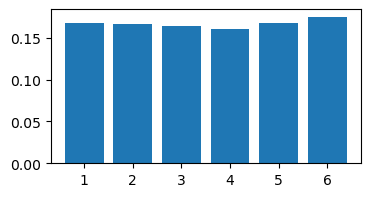

In [112]:
dice = np.array([1, 2, 3, 4, 5, 6])

n = 5000

mean = 0

freq = np.zeros(6)

for i in range(n):
    d = np.random.choice(dice, p=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
    
    mean += d
    
    freq[d - 1] += 1

mean = mean / n

freq = freq / n

print(f"mean = {mean}")
print(f"freq = {freq}")

plt.figure(figsize=(4, 2))

plt.bar(dice, freq)

plt.show()

mean = 2.0774
freq = [0.4052 0.3988 0.053  0.0466 0.0492 0.0472]


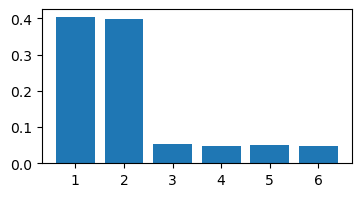

In [114]:
dice = np.array([1, 2, 3, 4, 5, 6])

n = 5000

mean = 0

freq = np.zeros(6)

for i in range(n):
    d = np.random.choice(dice, p=[0.4, 0.4, 0.05, 0.05, 0.05, 0.05])
    
    mean += d
    
    freq[d - 1] += 1

mean = mean / n

freq = freq / n

print(f"mean = {mean}")
print(f"freq = {freq}")

plt.figure(figsize=(4, 2))

plt.bar(dice, freq)

plt.show()

In [120]:
dice = np.array([1, 2, 3, 4, 5, 6])

p1 = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

p2 = np.array([0.4, 0.4, 0.05, 0.05, 0.05, 0.05])

print(f"E1(dice) = Sum(p1_i * dice_i) = {sum(p1 * dice)}")
print(f"Var1(dice) = Sum(p1_i * (dice_i - E1(dice)) ** 2) = {sum(p1 * (sum(p1 * dice)) ** 2)}")
print(f"sigma1(dice) = sqrt(Var1(dice)) = {np.sqrt(sum(p1 * (sum(p1 * dice)) ** 2))}")
print("---")
print(f"E2(dice) = Sum(p2_i * dice_i) = {sum(p2 * dice)}")
print(f"Var2(dice) = Sum(p2_i * (dice_i - E2(dice)) ** 2) = {sum(p2 * (sum(p2 * dice)) ** 2)}")
print(f"sigma2(dice) = sqrt(Var2(dice)) = {np.sqrt(sum(p2 * (sum(p2 * dice)) ** 2))}")

E1(dice) = Sum(p1_i * dice_i) = 3.5
Var1(dice) = Sum(p1_i * (dice_i - E1(dice)) ** 2) = 12.249999999999998
sigma1(dice) = sqrt(Var1(dice)) = 3.4999999999999996
---
E2(dice) = Sum(p2_i * dice_i) = 2.1
Var2(dice) = Sum(p2_i * (dice_i - E2(dice)) ** 2) = 4.410000000000001
sigma2(dice) = sqrt(Var2(dice)) = 2.1


---

# Part 3

### Continuous Random Variables

* In some cases, outcomes cannot be listed, e.g. measuring heights or weights of people
* In such cases the random variables we work with are called **continuous random variables**
* The role of the pmf is taken by a **probability density function (pdf)**
* The pdf, say $f(x)$, has a property that
\begin{equation} \int_{-\infty}^{+\infty} f(x)\, dx = 1\end{equation}
* Let $X$ be a continuous random variable and let $[a, b]$ be an interval of possible outcomes. We define the probability that $X \in [a, b]$, or $a \leqslant X \leqslant b$, by
\begin{equation}
P(X \in [a, b]) = P(a \leqslant X \leqslant b) = \int_a^b f(x)\, dx
\end{equation}

### Example 4
Let $X$ be a random variable such that $X \in [0, 1]$, and the pdf is given by
\begin{equation}f(x) = \frac{15}{2} x^2 (1-x^2)\end{equation}
* Show that that $f(x)$ is really a pdf, i.e. that $P(0 \leqslant X \leqslant 1) = 1$
* Find the probability that $X \in [0.5, 0.8]$

In [16]:
x = sp.Symbol('x')

f = (15 / 2) * x ** 2 * (1 - x ** 2)

a, b = 0, 1

F = sp.integrate(f, (x, a, b))

print(f"P({a} <= x <= {b}) = {F}")

a, b = 0.5, 0.8

print(f"P({a} <= x <= {b}) = {sp.integrate(f, (x, a, b))}")

P(0 <= x <= 1) = 1.00000000000000
P(0.5 <= x <= 0.8) = 0.522855000000000


---

### Expected Value, Variance and Standard Deviation for continuous variables
* For a random variable $X$ with a pdf $f(x)$, we define the expected value$E(X)$, the variance $Var(X)$ and the standard deviation $\sigma_X$ as
\begin{equation}
\begin{array}{rcl}
E(X) &=& \displaystyle\int_{-\infty}^{+\infty} x \cdot f(x)\, dx\\
Var(X) &=& \displaystyle\int_{-\infty}^{+\infty} \Big(x - E(X) \Big)^2 \cdot f(x)\, dx\\
\sigma_X &=& \sqrt{Var(X)}
\end{array}
\end{equation}

**Notes:**
* The $E(X)$ and $Var(X)$ exists only if the integral returns a finite value
* Instead of infinite boundaries, we will be using the smallest and largest value that the pdf can take

### Example 5
For the random variable $X$ given in **Example 4** calculate the expectation, the variance and the standard deviation

In [29]:
# Define and init variables:
x = sp.Symbol('x')

# Define the function f(x):
f = (15 / 2) * x ** 2 * (1 - x ** 2)

# Define the integral for the calculation of P(a <= x <= b):
P = lambda a, b : sp.integrate(f, (x, a, b))

E = sp.integrate(x * f, (x, 0, 1))

Var = sp.integrate((x - E) ** 2 * f, (x, 0, 1))

sigma = sp.sqrt(Var)

print(f"E = {E}")
print(f"Var = {Var}")
print(f"sigma = {sigma}")

E = 0.625000000000000
Var = 0.0379464285714286
sigma = 0.194798430618495


---

### Practice
A continuous random variable $X$ has a pdf $f(x)$ given by
\begin{equation}
f(x) = 6(x - x^2)
\end{equation}
for $x \in [0, 1]$. Calculate:

a) $P(0.2 \leqslant X \leqslant 0.8)$

b) $P(X \leqslant 0.7)$

c) $P(X \geqslant 0.9)$

d) $\sigma_X$

In [35]:
# Define variable(s):
x = sp.Symbol('x')

# Define f(x):
f = 6 * (x - x ** 2)

# Define pdf / cdf:
P = lambda a, b: sp.integrate(f, (x, a, b))

print(f"a) P(0.2 <= X <= 0.8) = {round(P(0.2, 0.8), 2)}")
print(f"b) P(0 <= X <= 0.7) = {round(P(0, 0.7), 2)}")
print(f"c) P(0.9 <= X <= 1) = {round(P(0.9, 1), 2)}")

E = sp.integrate(x * f, (x, 0, 1))
Var = sp.integrate((x * E) ** 2 * f, (x, 0, 1))

print(f"d) sigma(x) = {sp.sqrt(Var)}")


a) P(0.2 <= X <= 0.8) = 0.79
b) P(0 <= X <= 0.7) = 0.78
c) P(0.9 <= X <= 1) = 0.03
d) sigma(x) = sqrt(30)/20
